# Y Chromosome Inverted Repeat Analysis

Notebook to analyze Y chromosome non-B annotations from T2T-CHM13

        chrom     start       end  length category
6177611  chrY      6935      6946      11    Short
6177612  chrY      6966      6977      11    Short
6177613  chrY      7316      7374      58   Medium
6177614  chrY      8853      8877      24    Short
6177615  chrY      9785      9801      16    Short
...       ...       ...       ...     ...      ...
6318729  chrY  62451423  62451434      11    Short
6318730  chrY  62451491  62451503      12    Short
6318731  chrY  62451750  62451763      13    Short
6318732  chrY  62452695  62452738      43   Medium
6318733  chrY  62452848  62453126     278   Medium

[141123 rows x 5 columns]
Number of chrY rows: 141123
Total bases covered on chrY (Mb): 9.396113


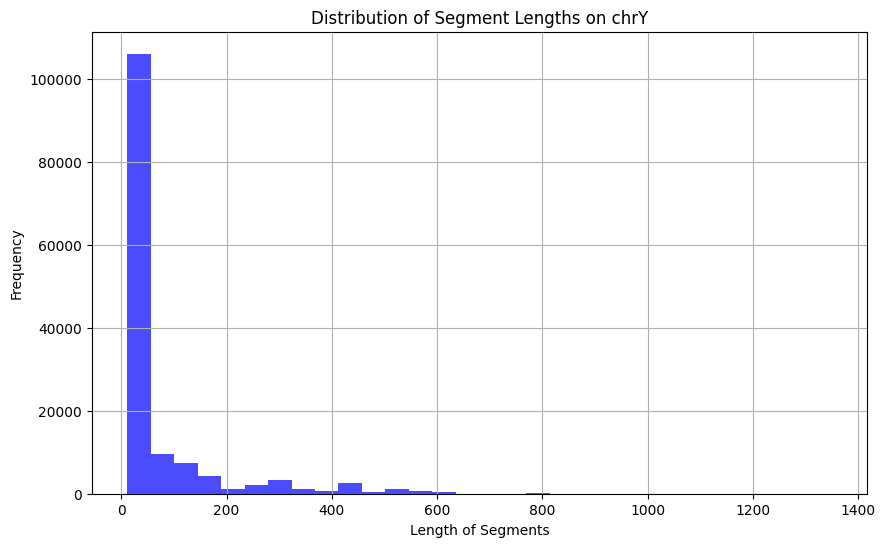

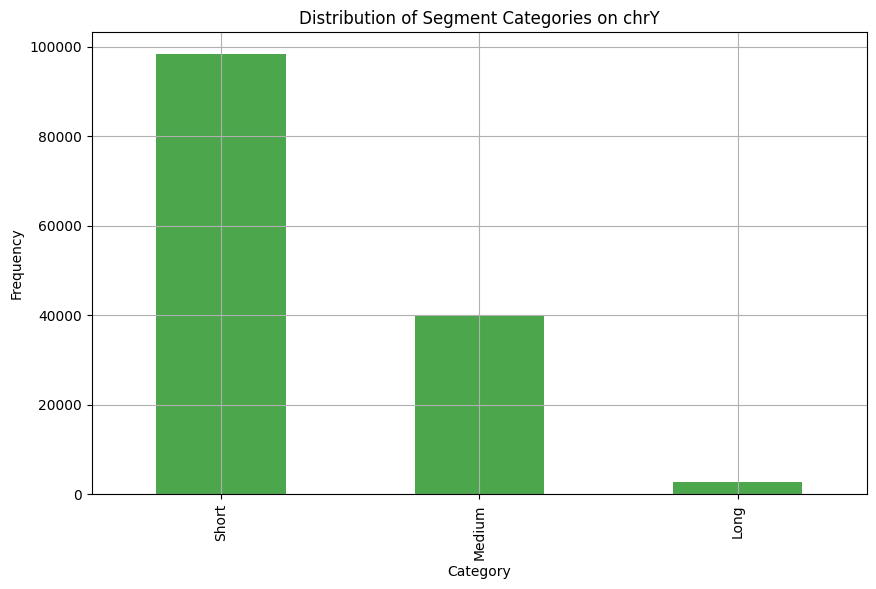

category
Short     98325
Medium    40148
Long       2650
Name: count, dtype: int64


In [4]:
### Y CHROMOSOME INVERTED REPEAT ANALYSIS

import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a BED file
bed_file_path = '~/scratch/results/bed_files/chm13/chm13_reference_genome/chm13v2.0_nonb_annotations_collapsed/IR/IR.collapsed.bed'
df = pd.read_csv(bed_file_path, sep='\t', header=None, names=['chrom', 'start', 'end'])

# Filter to keep only chrY
df_chrY = df[df['chrom'] == 'chrY'].copy()

# Calculate the length of each interval
df_chrY['length'] = df_chrY['end'] - df_chrY['start']

# Define categories based on length
def categorize_length(length):
    if length <= 30:
        return 'Short'
    elif length <= 499:
        return 'Medium'
    else:
        return 'Long'

# Apply the categorization function
df_chrY['category'] = df_chrY['length'].apply(categorize_length)

# Calculate the total bases covered
total_bases_covered = df_chrY['length'].sum()

# Count the number of chrY rows
chrY_count = len(df_chrY)

# Display the DataFrame, the count of chrY rows, and the total bases covered
print(df_chrY)
print(f'Number of chrY rows: {chrY_count}')
print(f'Total bases covered on chrY (Mb): {total_bases_covered/1000000}')

# Plotting the distribution of lengths
plt.figure(figsize=(10, 6))
plt.hist(df_chrY['length'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Segment Lengths on chrY')
plt.xlabel('Length of Segments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plotting the count of each category
plt.figure(figsize=(10, 6))
df_chrY['category'].value_counts().plot(kind='bar', color='green', alpha=0.7)
plt.title('Distribution of Segment Categories on chrY')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(df_chrY['category'].value_counts())

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe
df = pd.read_csv('~/scratch/nonb_motif_annotations_hgsvc/chm13/chm13_nonb_gfa_annotations_tsvs/chm13v2.0_IR_chrY.tsv', sep="\t")

# Filter the dataframe to only include rows where Repeat value is less than or equal to 6
#filtered_df = df[(df['Repeat'] <= 6)]


# Further filter to include Spacer lengths of 4-5 and Repeat lengths between 6-25
#filtered_df = df[(df['Spacer'].between(6, 100)) & (df['Repeat'].between(30, 111))]
#print(f"Filtered DataFrame shape: {filtered_df.shape}")

# Extract necessary columns for BED file
#bed_file = filtered_df[['Sequence_name', 'Start', 'Stop']]

# Save the filtered dataframe to a CSV file without header and index
#bed_file.to_csv('~/scratch/nonb_motif_annotations_hgsvc/chm13/chm13_nonb_gfa_annotations_tsvs/chm13v2.0_IR_chrY_sp6_100_re_30_111_filtered.bed', sep="\t", header=False, index=False)

# Print the shape of the original dataframe
print(f"Original DataFrame shape: {df.shape}")

# Ensure Spacer and Repeat columns are numeric
df.loc[:, 'Spacer'] = pd.to_numeric(df['Spacer'], errors='coerce')
df.loc[:, 'Repeat'] = pd.to_numeric(df['Repeat'], errors='coerce')

# Print the max and min values of Spacer and Repeat columns
max_spacer = df['Spacer'].max()
min_spacer = df['Spacer'].min()
max_repeat = df['Repeat'].max()
min_repeat = df['Repeat'].min()

print(f"Max Spacer: {max_spacer}")
print(f"Min Spacer: {min_spacer}")
print(f"Max Repeat: {max_repeat}")
print(f"Min Repeat: {min_repeat}")

# Plotting the distribution for Spacer values
plt.figure(figsize=(8, 6))
df['Spacer'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Spacer Values (chrY - CHM13-T2T)')
plt.xlabel('Spacer Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plotting the distribution for Repeat values
plt.figure(figsize=(8, 6))
df['Repeat'].plot(kind='hist', bins=50, color='lightcoral', edgecolor='black')
plt.title('Distribution of Repeat Values (chrY - CHM13-T2T)')
plt.xlabel('Repeat Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Creating a pivot table for the 2D heatmap
heatmap_data = df.pivot_table(index='Spacer', columns='Repeat', aggfunc='size', fill_value=0)

# Filter heatmap data to include only repeats of length 6 to 25
heatmap_data_filtered = heatmap_data.loc[6:100, 30:111]

# Plotting the 2D Heatmap with counts
plt.figure(figsize=(15, 15))
sns.heatmap(heatmap_data_filtered, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Counts'})
plt.title('2D Heatmap of Repeat and Spacer Values with Counts')
plt.xlabel('Repeat Value')
plt.ylabel('Spacer Value')
plt.tight_layout()
plt.show()

# Finding the most common Repeat and Spacer combinations
common_combinations = df.groupby(['Repeat', 'Spacer']).size().reset_index(name='Counts')
common_combinations_sorted = common_combinations.sort_values(by='Counts', ascending=False)

# Filter and display the common combinations with counts greater than 1000
common_combinations_gt1 = common_combinations_sorted[common_combinations_sorted['Counts'] > 1000]
print(common_combinations_gt1)
